Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Uploading file as dataframe.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [4]:
df=pd.read_csv('Iris.csv')

In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Description of data

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Checking if there is any duplicate data

In [23]:
dc=df.duplicated()
print('No. of duplicate rows is', dc.sum())
df[dc]

No. of duplicate rows is 3


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Deleting duplicate data

In [25]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum(), 'duplicate rows')

0 duplicate rows


In [27]:
df.shape

(147, 5)

Visualization of data

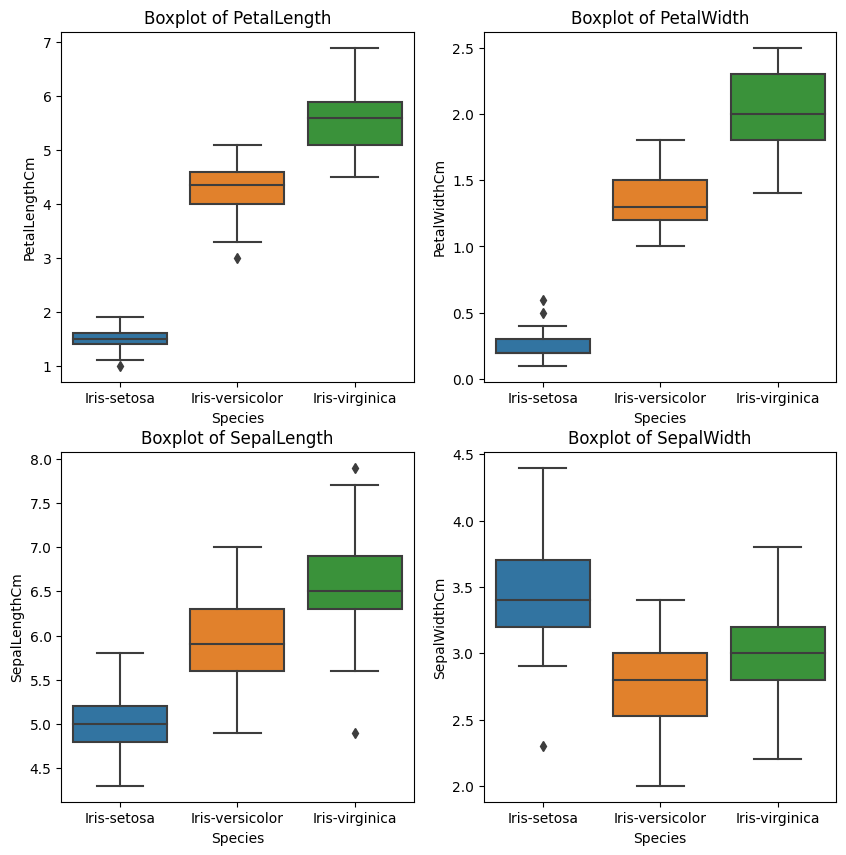

In [29]:
import seaborn as sns
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Box plot of Petal Length
sns.boxplot(ax=ax[0,0], x="Species",y="PetalLengthCm",data=df);
ax[0,0].set_title("Boxplot of PetalLength")

# Box plot of Petal Width
sns.boxplot(ax=ax[0,1], x="Species",y="PetalWidthCm",data=df);
ax[0,1].set_title("Boxplot of PetalWidth")

# Box Plot of Sepal Leangth
sns.boxplot(ax=ax[1,0], x="Species",y="SepalLengthCm",data=df);
ax[1,0].set_title("Boxplot of SepalLength")

# box plot of Sepal Width
sns.boxplot(ax=ax[1,1], x="Species",y="SepalWidthCm",data=df);
ax[1,1].set_title("Boxplot of SepalWidth");

Importing more libraries for Logistic regression and analysis

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree




<Axes: xlabel='PetalWidthCm'>

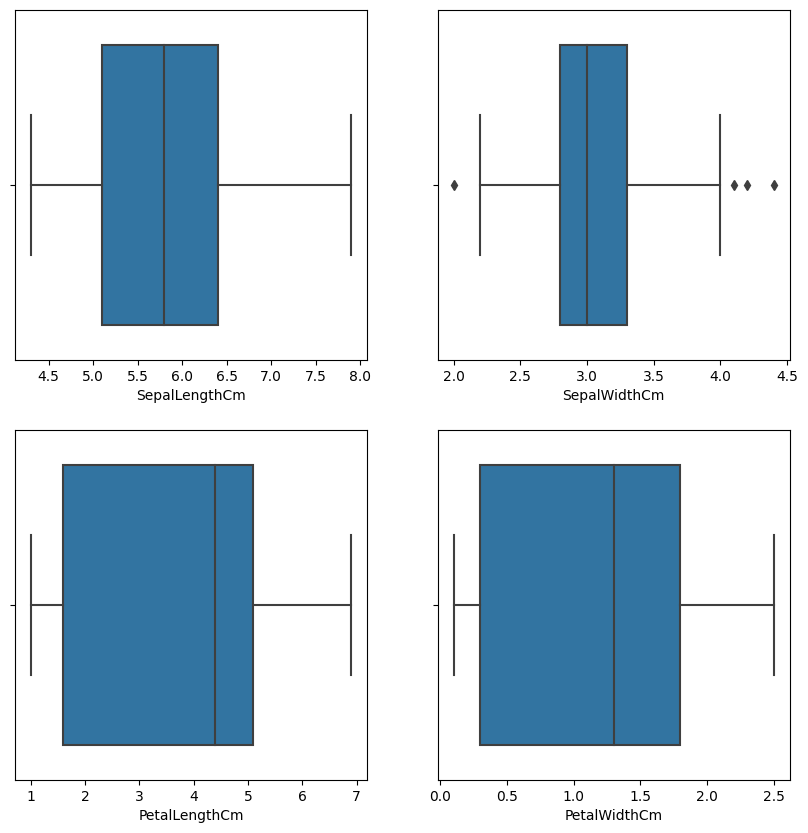

In [37]:

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(ax=ax[0,0], x='SepalLengthCm', data=df)

sns.boxplot(ax=ax[0,1], x='SepalWidthCm', data=df)

sns.boxplot(ax=ax[1,0], x='PetalLengthCm', data=df)

sns.boxplot(ax=ax[1,1], x='PetalWidthCm', data=df)

<Axes: xlabel='SepalWidthCm'>

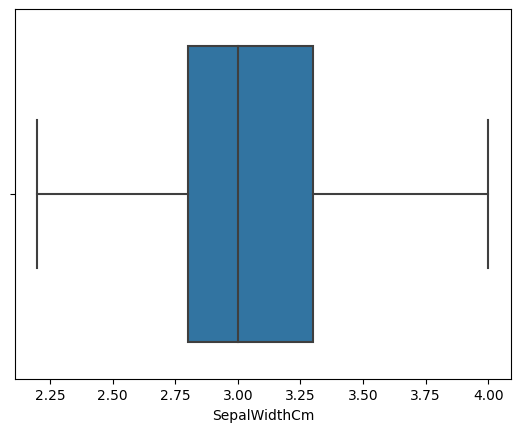

In [39]:
# Remove outliers from Sepal width

q1 = df['SepalWidthCm'].quantile(0.25)
q3 = df['SepalWidthCm'].quantile(0.75)
iq_range = q3 - q1
df = df[(df['SepalWidthCm'] >= q1-1.5*iq_range) & (df['SepalWidthCm'] <= q3+1.5*iq_range)]
# Box plot of sepal Width after outlier treatment
sns.boxplot(x='SepalWidthCm', data=df)

In [40]:
df.shape

(143, 5)

Correlation

In [42]:
corr = df.corr()
corr

<ipython-input-42-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.113268,0.879015,0.821715
SepalWidthCm,-0.113268,1.000000,-0.396539,-0.328102
PetalLengthCm,0.879015,-0.396539,1.000000,0.960785
PetalWidthCm,0.821715,-0.328102,0.960785,1.000000


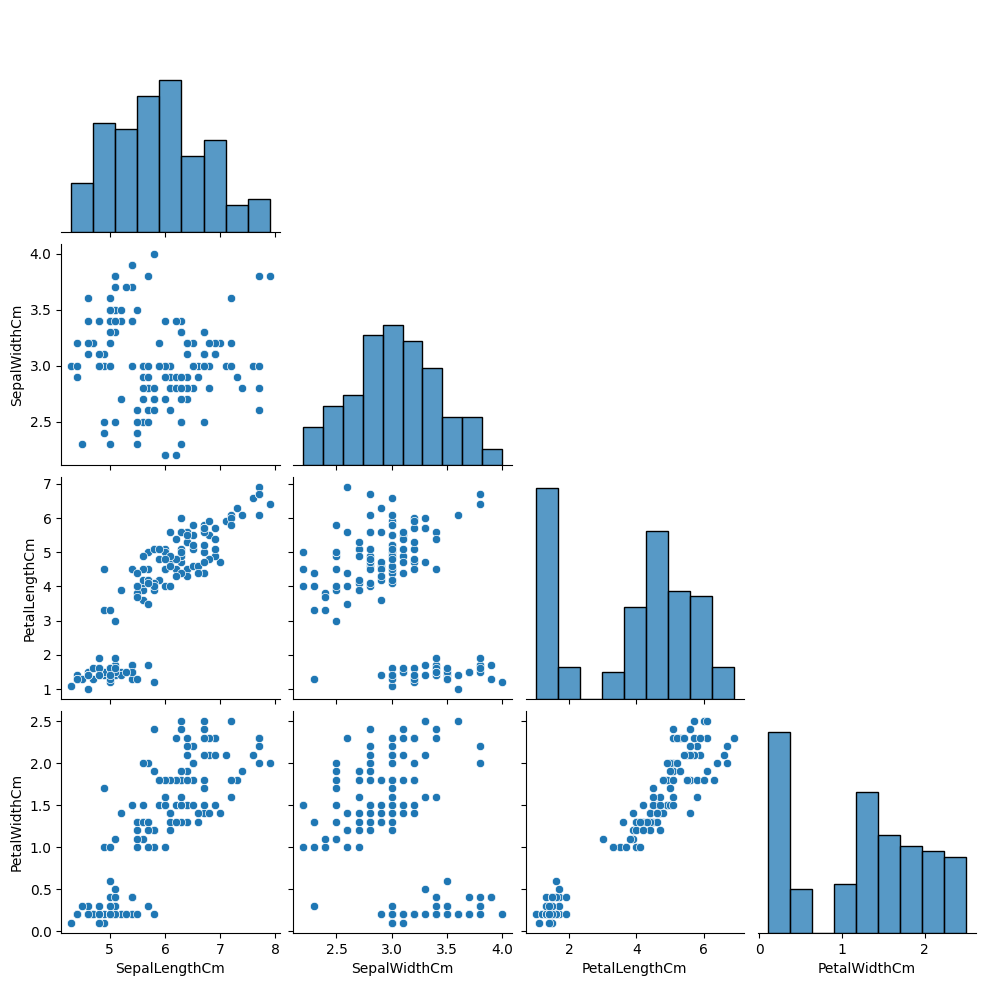

In [44]:
sns.pairplot(df, corner=True)
plt.show()


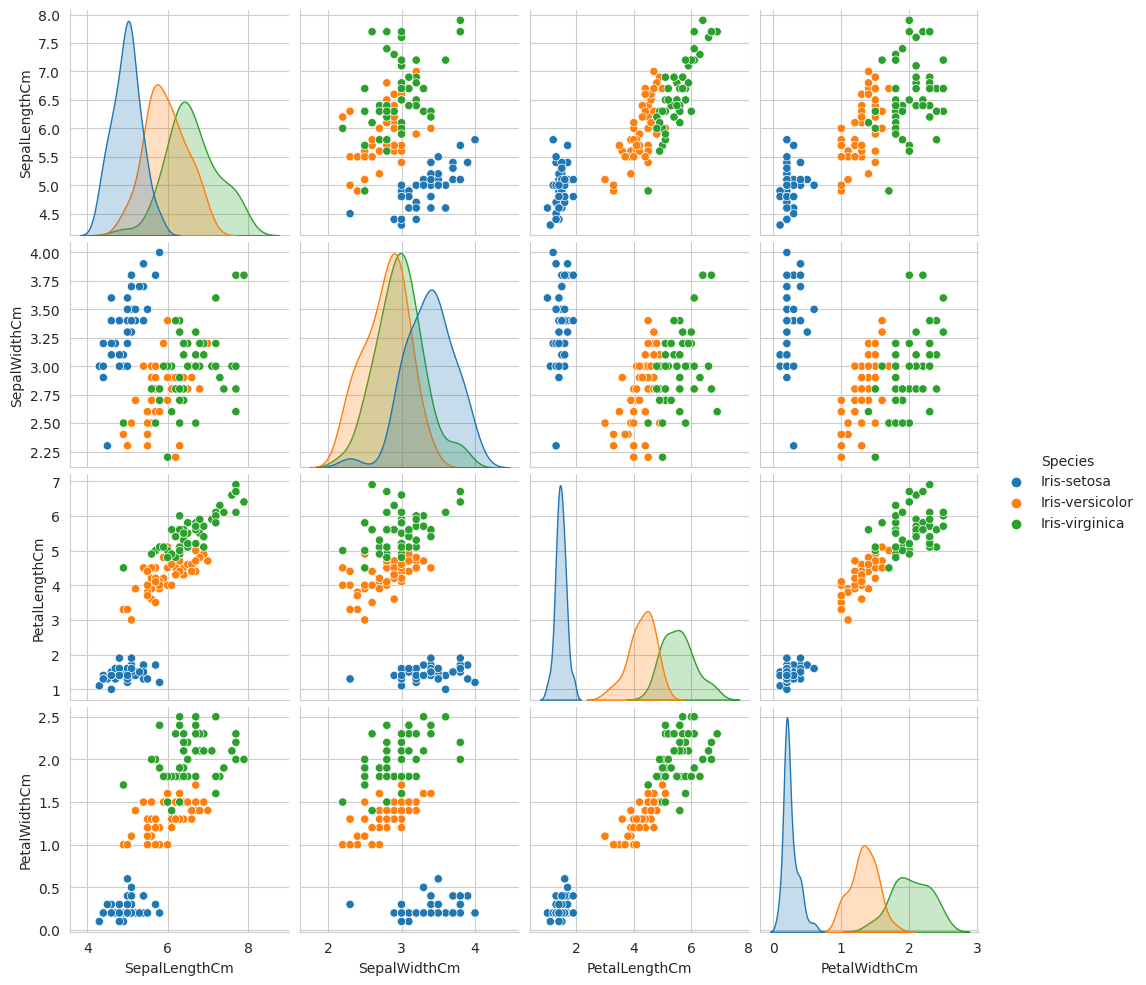

In [45]:

sns.set_style('whitegrid')
sns.pairplot(df, hue='Species')
plt.show()

Encoding species data

In [46]:
L_encoder=LabelEncoder()

df["Species"]=L_encoder.fit_transform(df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
X=df.iloc[:, :-1]
label=df.iloc[:,-1]
# Split data for Training(80%) and Testing(20%)
X_train, X_test, train_labels, test_labels = train_test_split(X, label, test_size=0.2, random_state=1)
# Shape of splited data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (114, 4)
X_test (29, 4)
train_labels (114,)
test_labels (29,)


In [48]:
dt_clf = DecisionTreeClassifier(criterion = 'gini')
dt_clf.fit(X_train, train_labels)

DecisionTreeClassifier()

In [49]:
pred = dt_clf.predict(X_test)

In [50]:
print("The accuracy of the model is", accuracy_score(pred,test_labels) *100,"%")

The accuracy of the model is 100.0 %


Prediction

In [51]:
pred1=dt_clf.predict([[6,4,1,3]])
pred1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [52]:
C_matrix=confusion_matrix(test_labels , pred)
C_matrix

array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  0,  6]])

CLASSIFICATION USING DECISION TREE VISUALIZATION

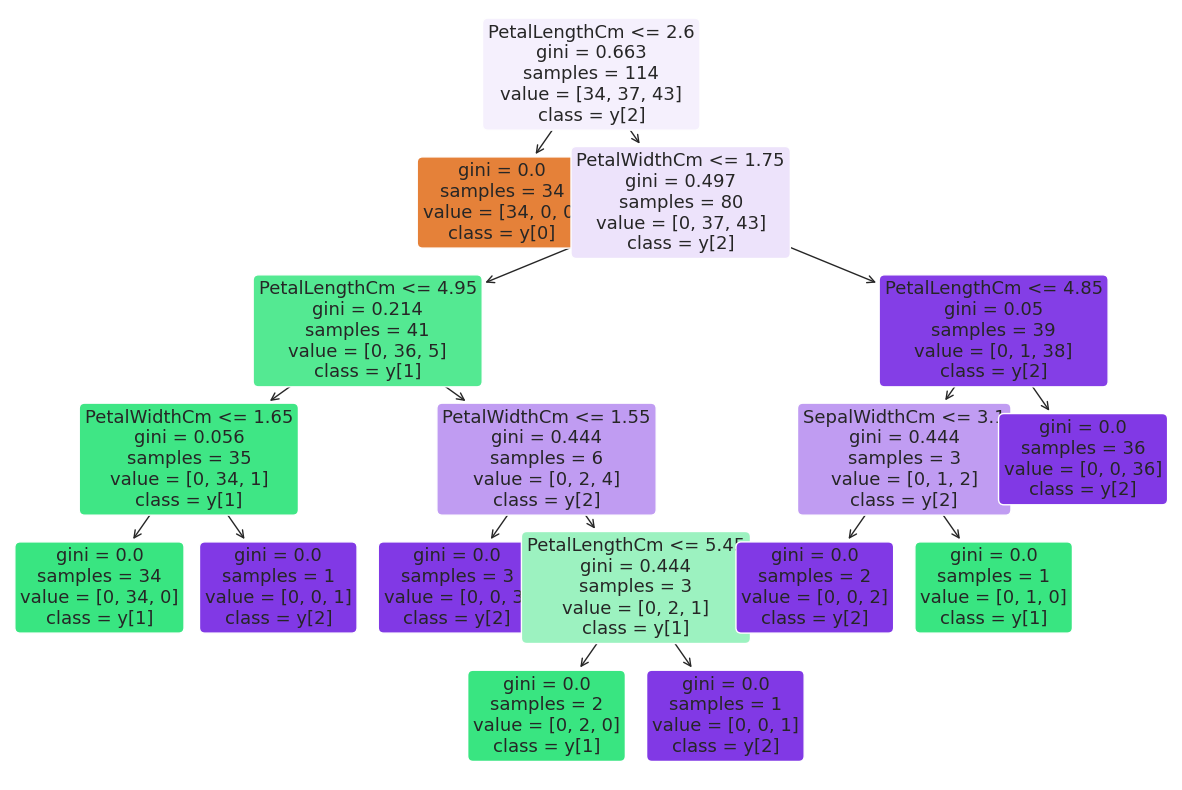

In [55]:
plt.figure(figsize=(15,10))
tree = plot_tree(dt_clf, feature_names=df.columns, rounded=True, filled=True, class_names=True, fontsize=13)